## Importing the Libraries

In [1]:
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('C:/Users/mrsub/Downloads/heart.csv')

## Taking Care of Missing Values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Taking care of Duplicate Values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

False

## Data Processing

In [9]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding Categorical Data

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Feature Scaling

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()

In [19]:
st = data[cont_val] = st.fit_transform(data[cont_val])

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Splitting the Dataset Into the Training Set and Test Set

In [21]:
X = data.drop('target',axis=1)

In [22]:
y = data['target']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

## Logistic Regression

In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

## SVC

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit(X_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

## KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred3=knn.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [42]:
score = []
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [43]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [44]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

## Non-Linear ML Algorithms

In [45]:
data = pd.read_csv('C:/Users/mrsub/Downloads/heart.csv')

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
data = data.drop_duplicates()

In [48]:
data.shape

(302, 14)

In [49]:
X = data.drop('target',axis=1)
y=data['target']

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred4= dt.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5= rf.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

## Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier()

In [63]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred6 = gbc.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [66]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                            accuracy_score(y_test,y_pred2),
                                                                            accuracy_score(y_test,y_pred3),
                                                                            accuracy_score(y_test,y_pred4),
                                                                            accuracy_score(y_test,y_pred5),
                                                                            accuracy_score(y_test,y_pred6)]})

In [67]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.852459
5,GB,0.803279


In [68]:
import seaborn as sns

C:\Users\mrsub\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

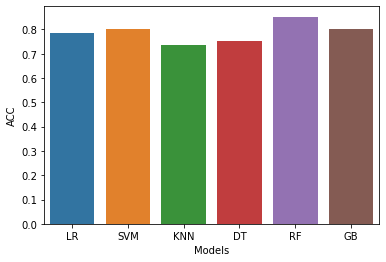

In [69]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [70]:
X = data.drop('target',axis=1)
y=data['target']

In [71]:
X.shape

(302, 13)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

## Prediction on New data

In [74]:
import pandas as pd

In [75]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [76]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [77]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


## Save Model Design Using Joblib

In [78]:
import joblib

In [79]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [80]:
model = joblib.load('model_joblib_heart')

In [81]:
model.predict(new_data)

array([0], dtype=int64)

## GUI

In [82]:
from tkinter import *
import joblib

def validate_entry(entry):
    if entry.get().strip() == "":
        entry.config(bg="red")
    else:
        entry.config(bg="white")

def show_entry_fields():
    p1 = int(entries[0].get())
    p2 = int(entries[1].get())
    p3 = int(entries[2].get())
    p4 = int(entries[3].get())
    p5 = int(entries[4].get())
    p6 = int(entries[5].get())
    p7 = int(entries[6].get())
    p8 = int(entries[7].get())
    p9 = int(entries[8].get())
    p10 = float(entries[9].get())
    p11 = int(entries[10].get())
    p12 = int(entries[11].get())
    p13 = int(entries[12].get())
    
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
    
    if result == 0:
        result_label.config(text="No Heart Disease", fg="red", font=("Arial", 12, "bold"))
    else:
        result_label.config(text="Possibility of Heart Disease", fg="red", font=("Arial", 12, "bold"))

master = Tk()
master.title("Heart Disease Prediction System")

def on_configure(event):
    canvas.configure(scrollregion=canvas.bbox('all'))

def make_round(widget):
    widget.config(relief=RAISED, bd=2, highlightthickness=2)

def create_entry(master, text):
    entry = Entry(master, bg="white", bd=2, relief="flat", font=("Arial", 12))
    entry.insert(0, text)
    entry.bind("<FocusIn>", lambda event: entry.delete(0, END))
    entry.bind("<KeyRelease>", lambda event: validate_entry(entry))
    return entry

canvas = Canvas(master)
canvas.pack(side=LEFT, fill=BOTH, expand=TRUE)
scrollbar = Scrollbar(master, command=canvas.yview)
scrollbar.pack(side=RIGHT, fill=Y)
canvas.configure(yscrollcommand=scrollbar.set)
frame = Frame(canvas)
canvas.create_window((0,0), window=frame, anchor='nw')
frame.bind("<Configure>", on_configure)

label = Label(frame, text="Heart Disease Prediction System", font=("Arial", 16, "bold"), fg="red")
label.pack(pady=10)

labels = ["Enter Your Age", "Male Or Female [1/0]", "Enter Value of CP", "Enter Value of trestbps",
          "Enter Value of chol", "Enter Value of fbs", "Enter Value of restecg", "Enter Value of thalach",
          "Enter Value of exang", "Enter Value of oldpeak", "Enter Value of slope", "Enter Value of ca",
          "Enter Value of thal"]
entries = []

for label_text in labels:
    entry = create_entry(frame, label_text)
    entry.pack(fill=X, padx=10, pady=5)
    entries.append(entry)

result_label = Label(frame, font=("Arial", 12))
result_label.pack(pady=10)

predict_button = Button(frame, text='Predict', command=show_entry_fields, bg="blue", fg="white", font=("Arial", 12))
predict_button.pack(ipady=5, padx=20, pady=10, fill=X)
make_round(predict_button)

mainloop()